In [21]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
import torch.optim as optim  # Import optimizer module

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the datasets
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=lambda y: torch.tensor(y, dtype=torch.long)  # Convert label to integer tensor
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=lambda y: torch.tensor(y, dtype=torch.long)  # Convert label to integer tensor
)

# Define your neural network
class MyFirstNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyFirstNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
       # Define a sequential container of layers.
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),  # First linear layer: input features from 28*28 to 512 hidden units.
            nn.ReLU(),              # Apply ReLU activation function to add non-linearity.
            nn.Linear(512, 512),    # Second linear layer: 512 hidden units to 512 hidden units.
            nn.ReLU(),              # Apply ReLU activation function again.
            nn.Linear(512, 10),     # Third linear layer: 512 hidden units to 10 output classes.
)

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Create an instance of the model and move it to the appropriate device
model = MyFirstNeuralNetwork().to(device)

# Define the optimizer, I chose the Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.001)
# Create data loaders
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the number of epochs
epochs = 3

# Training loop
for e in range(1,epochs + 1):
    print(f"{e} Epoch's")
    lossi = 0.0
    
    for input, label in train_loader:
        input, label = input.to(device), label.to(device)  # Move input and labels to device
        logits = model(input)
        loss = loss_fn(logits, label)  # Calculate the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        lossi = loss.item()
    print(lossi)

1 Epoch's
0.5376285314559937
2 Epoch's
0.11607526242733002
3 Epoch's
0.01244540885090828


In [22]:
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation during evaluation
    for input, label in test_loader:
        input, label = input.to(device), label.to(device)  # Move input and labels to device
        logits = model(input)
        _, predicted = torch.max(logits, 1)  # Get the predicted class with highest probability
        total += label.size(0)  # Increment the total number of samples
        correct += (predicted == label).sum().item()  # Increment the number of correctly predicted samples

print(f"Accuracy on the test set: {(correct / total) * 100:.2f}%")

Accuracy on the test set: 94.09%


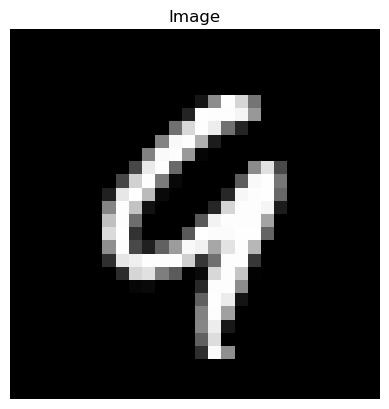

Correct label for sample: 9
Predicted number: 9


In [23]:
#Sampling a prediction on a single digit
import random
import matplotlib.pyplot as plt
random_number = random.randint(1, 1000)
image, label = test_data[random_number]
image = image.squeeze().numpy()
plt.imshow(image, cmap='gray')
plt.title(f'Image')
plt.axis('off')
plt.show()

X = test_data[random_number][0]
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Correct label for sample: {label}")
print(f"Predicted number: {y_pred.data.item()}")